<a href="https://colab.research.google.com/github/magnusbrigido/IA/blob/main/U2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questão 1A

313/313 [==============================] - 1s 1ms/step


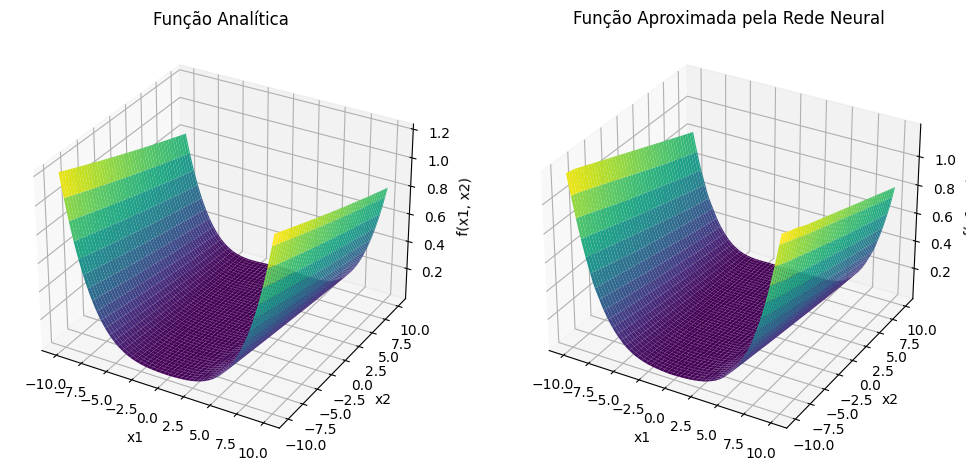

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

#Função alvo
def targetFunction(x1, x2):
  return (1 - x1)**2 + (1 - x2)**2 + 100 * (x2 - x1**2)**2

#geração de dados de treinamento e validação
np.random.seed(0)
samples_quantity = 1000
#Treinamento
x1Train = np.random.uniform(low = -10, high = 10, size=(samples_quantity,))
x2Train = np.random.uniform(low = -10, high = 10, size=(samples_quantity,))
yTrain = targetFunction(x1Train, x2Train)
#Validação
x1Val = np.random.uniform(low = -10, high = 10, size=(samples_quantity,))
x2Val = np.random.uniform(low = -10, high = 10, size=(samples_quantity,))
yVal = targetFunction(x1Val, x2Val)

#Definição da arquitetura da rede neural
model = Sequential()
#Primera camada densa com 32 neurônios com 2 variáveis de entrada
model.add(Dense(64, activation='relu', input_shape=(2,)))
model.add(Dense(32, activation='relu')),
model.add(Dense(16, activation='relu')),
model.add(Dense(8, activation='relu')),
model.add(Dense(1, activation='linear'))
#Compilação do modelo
model.compile(loss='mean_squared_error', optimizer="adam")

#Treinamento do modelo
#100 épocas e 32 lotes (batch, numero de amostras processadas de uma vez em cada etapa), 0 verbose para não exibir o progresso de treinamento
history = model.fit(
    np.column_stack((x1Train, x2Train)),
    yTrain, validation_data = (np.column_stack((x1Val, x2Val)), yVal),
    epochs = 1000,
    batch_size = 8,
    verbose = 0
)

#Geração de predições
x1Test = np.linspace(-10, 10, 100)
x2Test = np.linspace(-10, 10, 100)
x1Mesh, x2Mesh = np.meshgrid(x1Test, x2Test)
inputs = np.column_stack((x1Mesh.ravel(), x2Mesh.ravel()))
yPred = model.predict(inputs).reshape(x1Mesh.shape)

#Plotagem de resultados
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

#Gráfico da função analítica
ax1.plot_surface(x1Mesh, x2Mesh, targetFunction(x1Mesh, x2Mesh), cmap='viridis')
ax1.set_title("Função Analítica")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_zlabel("f(x1, x2)")
#Gráfica da função aproximada
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(x1Mesh, x2Mesh, yPred, cmap='viridis')
ax2.set_title("Função Aproximada pela Rede Neural")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_zlabel("f(x1, x2)")
plt.show()

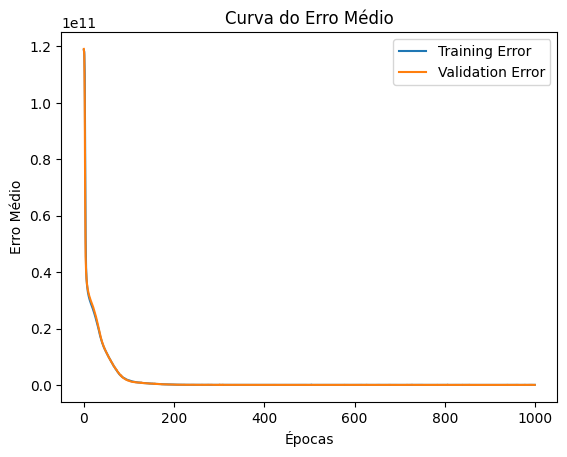

In [ ]:
# Plotando as curvas de erro
plt.plot(history.history['loss'], label='Training Error')
plt.plot(history.history['val_loss'], label='Validation Error')
plt.title('Curva do Erro Médio')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio')
plt.legend()
plt.show()

#Questão 1B

313/313 [==============================] - 0s 1ms/step


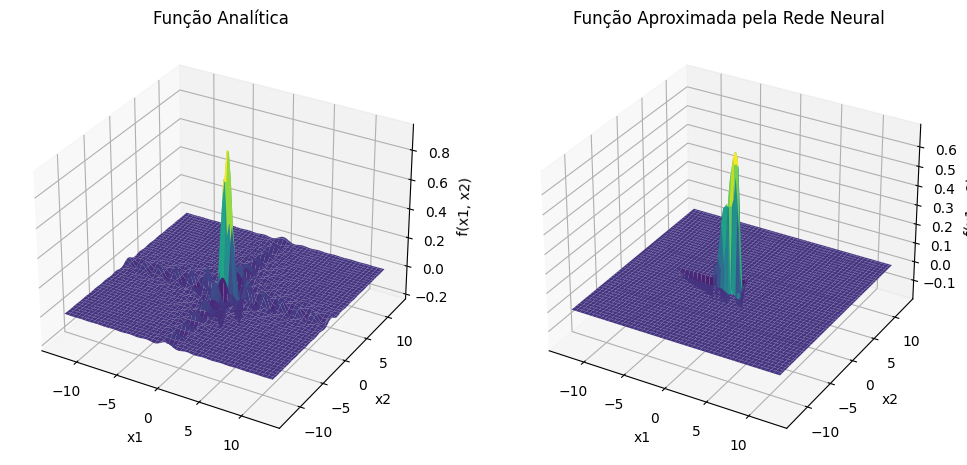

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

def targetFunction(x1, x2):
  return (np.sin(np.pi*x1)/(np.pi*x1))*(np.sin(np.pi*x2)/(np.pi*x2))

#geração de dados de treinamento e validação
np.random.seed(0)
samples_quantity = 1000
#Treinamento
x1Train = np.random.uniform(low = -4*np.pi, high = 4*np.pi, size=(samples_quantity,))
x2Train = np.random.uniform(low = -4*np.pi, high = 4*np.pi, size=(samples_quantity,))
yTrain = targetFunction(x1Train, x2Train)
#Validação
x1Val = np.random.uniform(low = -4*np.pi, high = 4*np.pi, size=(samples_quantity,))
x2Val = np.random.uniform(low = -4*np.pi, high = 4*np.pi, size=(samples_quantity,))
yVal = targetFunction(x1Val, x2Val)

#Definição da arquitetura da rede neural
model = Sequential()
#Primera camada densa com 32 neurônios com 2 variáveis de entrada
model.add(Dense(64, activation='relu', input_shape=(2,)))
model.add(Dense(32, activation='relu')),
model.add(Dense(16, activation='relu')),
model.add(Dense(8, activation='relu')),
model.add(Dense(1, activation='linear'))
#Compilação do modelo
model.compile(loss='mean_squared_error', optimizer="adam")

#Treinamento do modelo
#100 épocas e 32 lotes (batch, numero de amostras processadas de uma vez em cada etapa), 0 verbose para não exibir o progresso de treinamento
history = model.fit(
    np.column_stack((x1Train, x2Train)),
    yTrain, validation_data = (np.column_stack((x1Val, x2Val)), yVal),
    epochs = 1000,
    batch_size = 8,
    verbose = 0
)

#Geração de predições
x1Test = np.linspace(-4*np.pi, 4*np.pi, 100)
x2Test = np.linspace(-4*np.pi, 4*np.pi, 100)
x1Mesh, x2Mesh = np.meshgrid(x1Test, x2Test)
inputs = np.column_stack((x1Mesh.ravel(), x2Mesh.ravel()))
yPred = model.predict(inputs).reshape(x1Mesh.shape)

#Plotagem de resultados
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

#Gráfico da função analítica
ax1.plot_surface(x1Mesh, x2Mesh, targetFunction(x1Mesh, x2Mesh), cmap='viridis')
ax1.set_title("Função Analítica")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_zlabel("f(x1, x2)")
#Gráfica da função aproximada
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(x1Mesh, x2Mesh, yPred, cmap='viridis')
ax2.set_title("Função Aproximada pela Rede Neural")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_zlabel("f(x1, x2)")
plt.show()

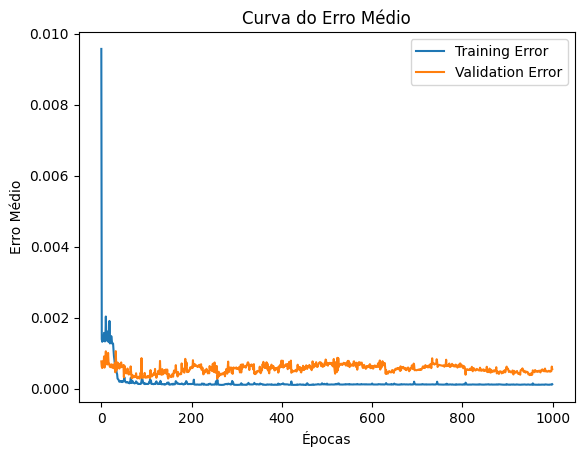

In [ ]:
# Plotando as curvas de erro
plt.plot(history.history['loss'], label='Training Error')
plt.plot(history.history['val_loss'], label='Validation Error')
plt.title('Curva do Erro Médio')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio')
plt.legend()
plt.show()

#Questão 2A

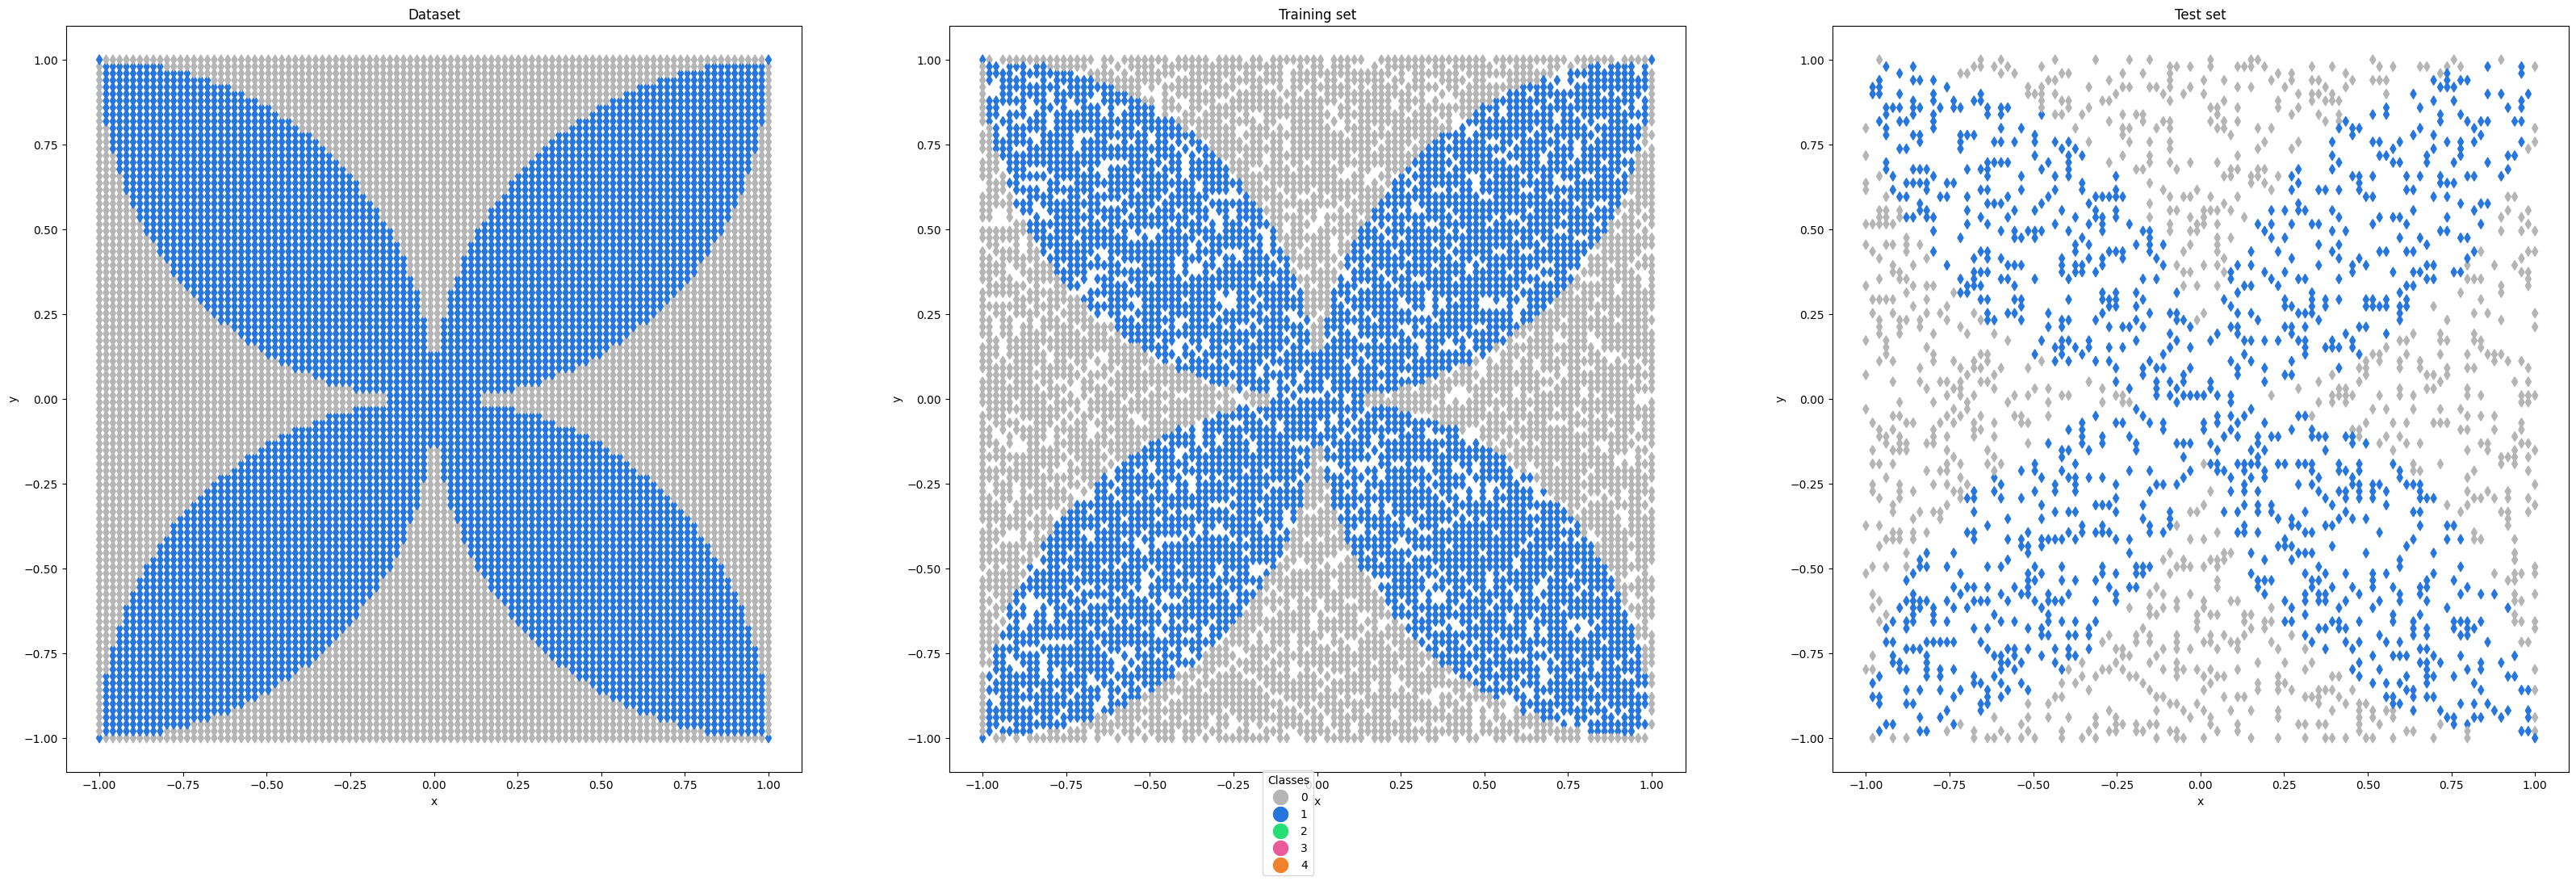

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from numpy.linalg import norm
from itertools import product

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dense, Reshape, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
import tensorflow as tf

def a(x, y):
    return (x + 1)**2 + y**2 <= 1
      
def c(x, y):
    return x**2 + (y + 1)**2 <= 1

def d(x,y):
    return (x - 1)**2 + y**2 <= 1

def e(x, y):
    return x**2 + (y - 1)**2 <= 1
    
x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

points = np.vstack(list(zip(x.ravel(), y.ravel())))

labels = np.array([ 
    1 if sum([a(x_i, y_i), d(x_i, y_i), c(x_i, y_i), e(x_i, y_i),]) >= 2
    else 0
    for x_i, y_i in points 
])

x_train, x_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, stratify=labels)
fig, ax = plt.subplots(ncols=3, figsize=(40, 12))

color1 = (181/255, 181/255, 181/255, 1.0)
color2 = (38/255, 118/255, 222/255, 1.0)
color3 = (38/255, 222/255, 118/255, 1.0)
color4 = (235/255, 91/255, 156/255, 1.0)
color5 = (240/255, 130/255, 44/255, 1.0)

colormap = np.array([color1, color2, color3, color4, color5])

dataset_scatter = ax[0].scatter(points[:,0], points[:,1], c=colormap[labels], marker='d')

ax[0].set(
    title='Dataset',
    xlabel='x',
    ylabel='y'
)

ax[1].scatter(x_train[:,0], x_train[:,1], c=colormap[y_train], marker='d')

ax[1].set(
    title='Training set',
    xlabel='x',
    ylabel='y'
)

ax[2].scatter(x_test[:,0], x_test[:,1], c=colormap[y_test], marker='d')

ax[2].set(
    title='Test set',
    xlabel='x',
    ylabel='y'
)

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(181/255, 181/255, 181/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(38/255, 118/255, 222/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(38/255, 222/255, 118/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(235/255, 91/255, 156/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(240/255, 130/255, 44/255), markersize=15)
]

fig.legend(
    legend_elements,
    ['0', '1', '2', '3', '4'],
    loc='lower center',
    title='Classes'
)

plt.show()

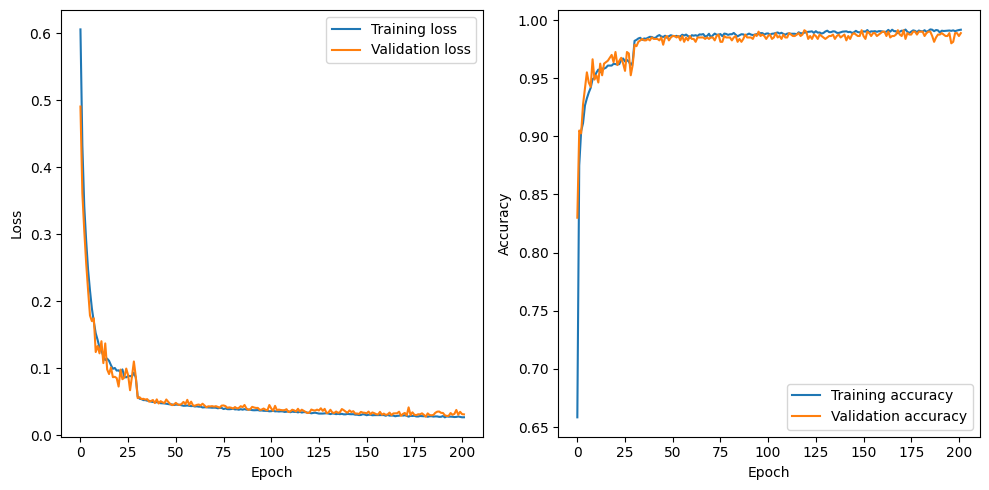

In [59]:
mlp = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

history = mlp.fit(
    x_train, y_train.reshape((-1,1)),
    validation_split=0.1,
    batch_size=10,
    epochs=2000,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=0.0001)
    ],
    verbose=0
)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')
ax[0].legend()
ax[0].set(
    ylabel='Loss',
    xlabel='Epoch'
)

ax[1].plot(history.history['acc'], label='Training accuracy')
ax[1].plot(history.history['val_acc'], label='Validation accuracy')

ax[1].set(
    ylabel='Accuracy',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [60]:
threshold = 0.6

y_pred = [ 1 if pred >= threshold else 0 for pred in mlp.predict(x_test) ] 

print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       883
           1       0.99      0.97      0.98      1117

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



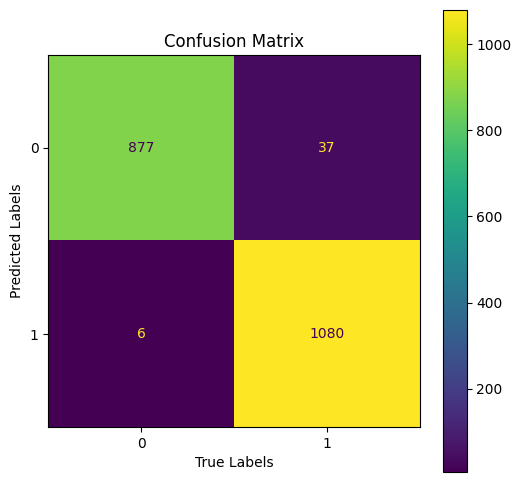

In [61]:
fig, ax = plt.subplots(figsize=(5, 5))

ConfusionMatrixDisplay(
    confusion_matrix(y_pred, y_test, labels=[0, 1]),
    display_labels=['0', '1']
).plot(values_format='.0f', ax=ax)

ax.set(
    title='Confusion Matrix',
    xlabel='True Labels',
    ylabel='Predicted Labels'
)

plt.show()

#Questão 2B

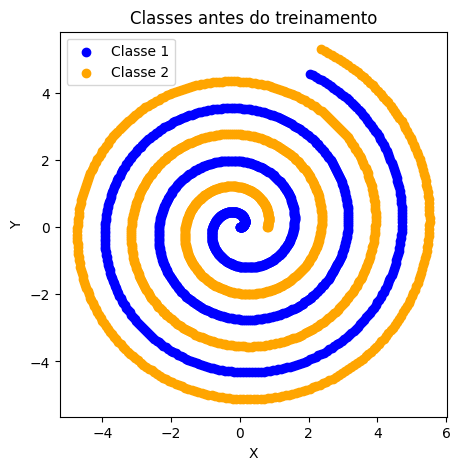

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Gerar os exemplos de treinamento para a espiral 1
theta = np.linspace(0, 20, 1000)
x1 = (theta / 4) * np.cos(theta)
y1 = (theta / 4) * np.sin(theta)
espiral1 = np.column_stack((x1, y1))
labels1 = np.zeros(len(theta))

# Gerar os exemplos de treinamento para a espiral 2
x2 = ((theta / 4) + 0.8) * np.cos(theta)
y2 = ((theta / 4) + 0.8) * np.sin(theta)
espiral2 = np.column_stack((x2, y2))
labels2 = np.ones(len(theta))

# Combinar os exemplos de treinamento e as classes
X_train = np.concatenate((espiral1, espiral2))
y_train = np.concatenate((labels1, labels2))

# Plotar as classes antes do treinamento
plt.figure(figsize=(5, 5))
plt.scatter(espiral1[:, 0], espiral1[:, 1], c='blue', label='Classe 1')
plt.scatter(espiral2[:, 0], espiral2[:, 1], c='orange', label='Classe 2')
plt.title('Classes antes do treinamento')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


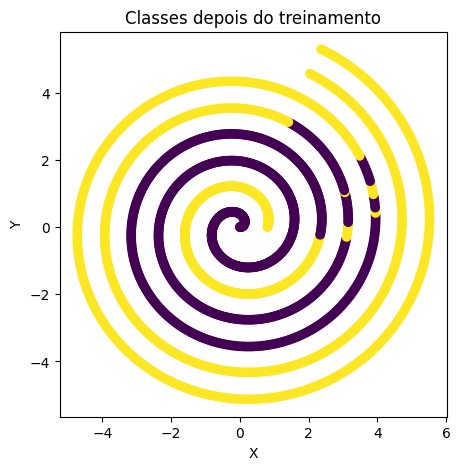

In [30]:
# Criar e treinar a rede perceptron de múltiplas camadas
clf = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', max_iter=2000)
clf.fit(X_train, y_train)

# Prever as classes dos exemplos de treinamento
y_pred = clf.predict(X_train)

# Plotar as classes depois do treinamento
plt.figure(figsize=(5, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, cmap='viridis')
plt.title('Classes depois do treinamento')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

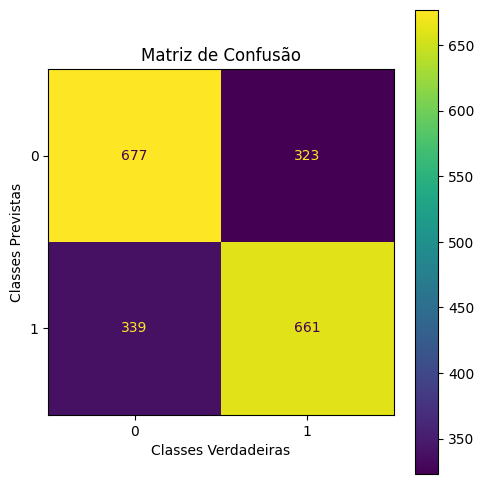

In [31]:
# Calcular a matriz de confusão
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred)).plot(values_format='.0f', ax=ax)
ax.set(
    title='Matriz de Confusão',
    xlabel='Classes Verdadeiras',
    ylabel='Classes Previstas'
)
plt.tight_layout()
plt.show()

#Questão 3

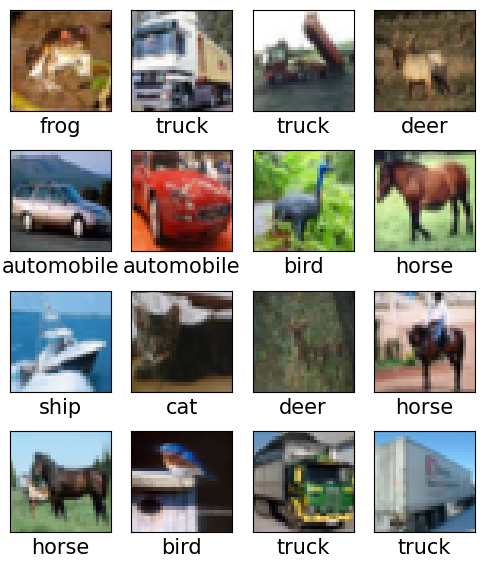

In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

#Carrega a base de dados do CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(6,7))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

    plt.xlabel(class_names[train_labels[i][0]], fontsize=15)
plt.show()

In [38]:
model = models.Sequential(name='CNN-CIFAR10')
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "CNN-CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_27 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)              

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 11s 5ms/step - loss: 1.7810 - accuracy: 0.3927 - val_loss: 1.4426 - val_accuracy: 0.4779
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3401 - accuracy: 0.5251 - val_loss: 1.2752 - val_accuracy: 0.5473
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1959 - accuracy: 0.5769 - val_loss: 1.1540 - val_accuracy: 0.5986
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0950 - accuracy: 0.6187 - val_loss: 1.1977 - val_accuracy: 0.5908
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0202 - accuracy: 0.6437 - val_loss: 1.1010 - val_accuracy: 0.6240
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9511 - accuracy: 0.6706 - val_loss: 1.0570 - val_accuracy: 0.6383
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8886 - accuracy: 0.6932 - val_loss: 1.0360 - val_accuracy

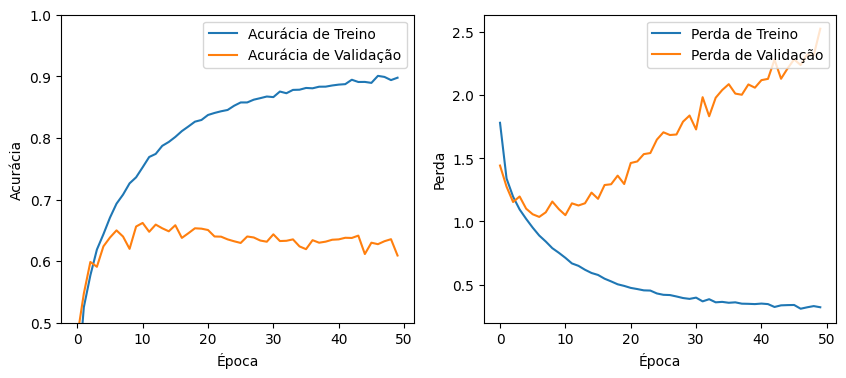

In [40]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label = 'Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.ylim([0.5, 1])
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label = 'Perda de Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(loc='upper right')

plt.show()

313/313 [==============================] - 1s 2ms/step


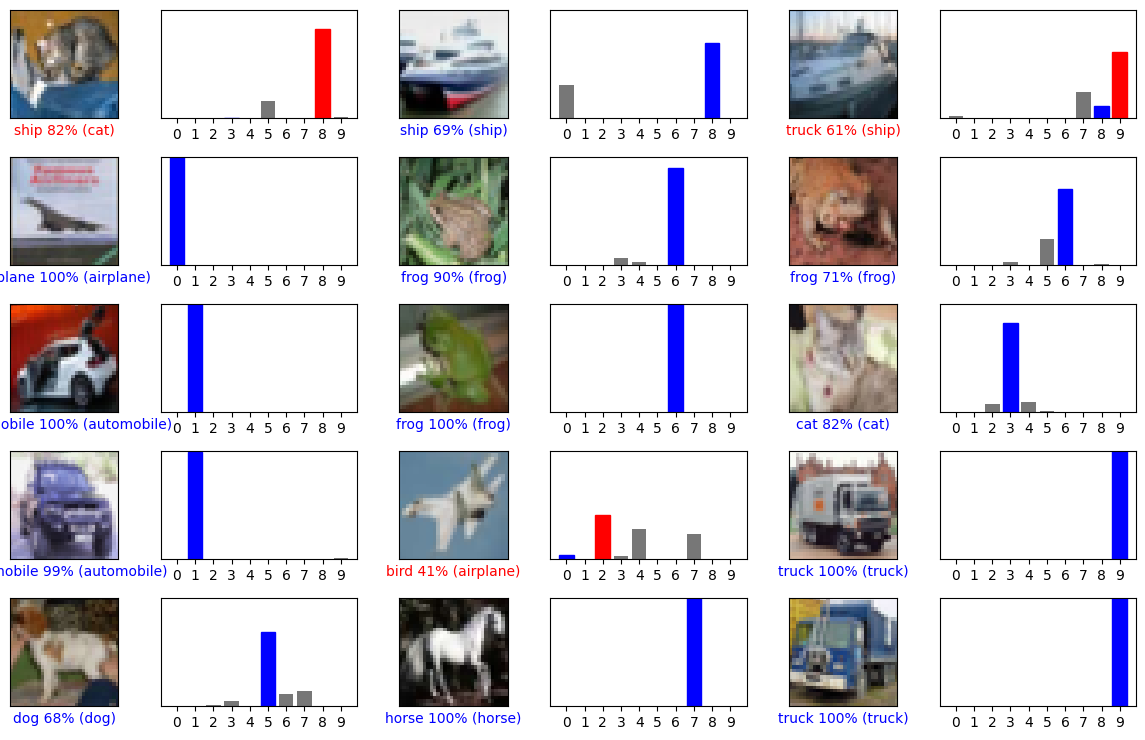

In [44]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
import numpy as np

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 1.5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#Questão 4

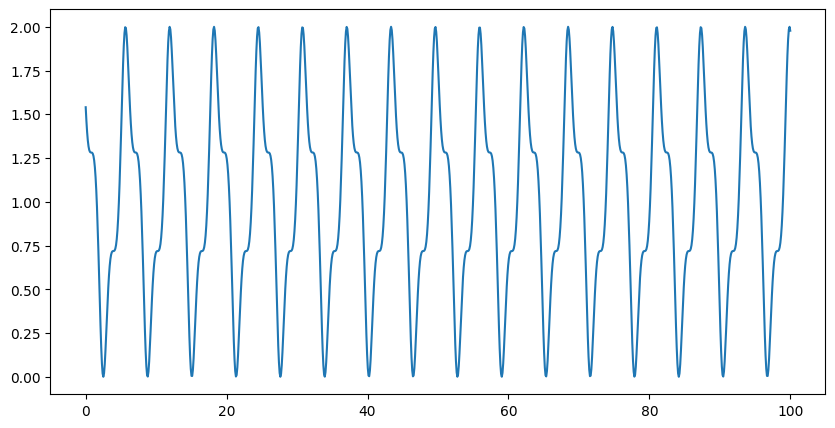

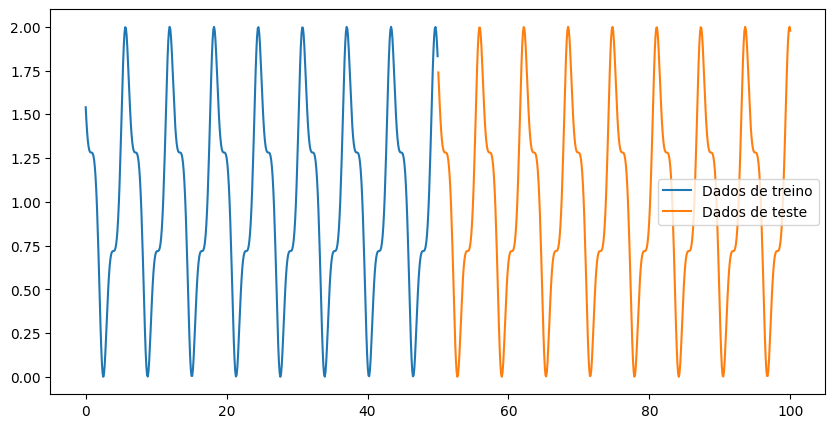

In [45]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

def func(n):
  return 1 + np.cos(n + np.cos(n)**2)

x = np.linspace(0, 100, 1000)
y = func(x)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y)
plt.show()

size = 500

X_train = x[:size]
y_train = y[:size]
X_test = x[size:]
y_test = y[size:]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(X_train, y_train, label='Dados de treino')
ax.plot(X_test, y_test, label='Dados de teste')
ax.legend()
plt.show()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 4, 64)             49408     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 128,417
Trainable params: 128,417
Non-trainable params: 0
_________________________________________________________________


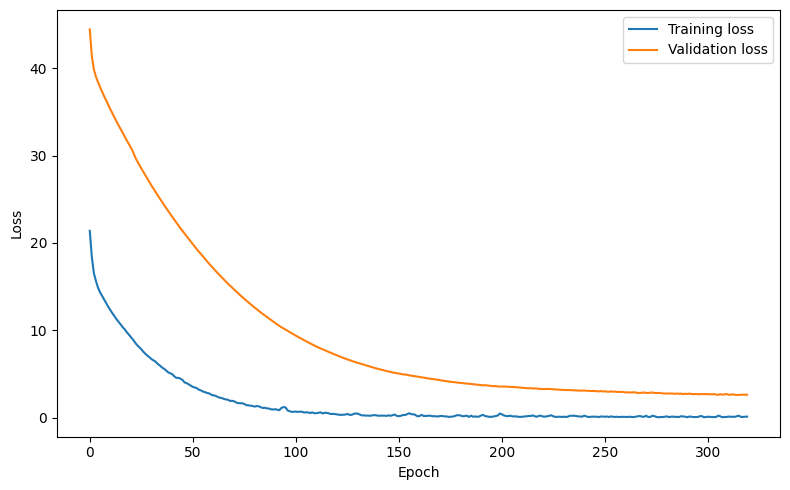

In [46]:
sequence_x = list(TimeseriesGenerator(X_train, X_train, 3, batch_size=1))
sequence_y = list(TimeseriesGenerator(X_train[3:], X_train[3:], 1, batch_size=1))

train_seqs = []
y_train = []

for (x_seq, next_x), (next_seq, _) in zip(sequence_x, sequence_y):
  seq = np.append(x_seq.reshape(3,), next_seq.reshape(1, ))
  
  train_seqs.append(seq)
  y_train.append(next_x)

train_seqs = np.array(train_seqs)
y_train = np.array(y_train)

sequence_x = list(TimeseriesGenerator(X_test, X_test, 3, batch_size=1))
sequence_y = list(TimeseriesGenerator(X_test[3:], X_test[3:], 1, batch_size=1))

test_seqs = []
y_test = []

for (x_seq, next_x), (next_seq, _) in zip(sequence_x, sequence_y):
  seq = np.append(x_seq.reshape(3,), next_seq.reshape(1, ))
  
  test_seqs.append(seq)
  y_test.append(next_x)

test_seqs = np.array(test_seqs)
y_test = np.array(y_test)

model = Sequential([
  LSTM(128, input_shape=(4, 1), return_sequences=True),
  LSTM(64, return_sequences=True),
  LSTM(32),
  Dense(1, activation='linear')
])

model.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer="adam")

model.summary()

history = model.fit(
  train_seqs, y_train,
  validation_split=0.1,
  epochs=500,
  shuffle=True,
  callbacks=[
    EarlyStopping(monitor='val_loss', patience=5),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
  ],
  verbose=0
)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Validation loss')
ax.legend()
ax.set(
  xlabel='Epoch',
  ylabel='Loss'
)
plt.legend()
plt.tight_layout()
plt.show()

16/16 [==============================] - 1s 3ms/step


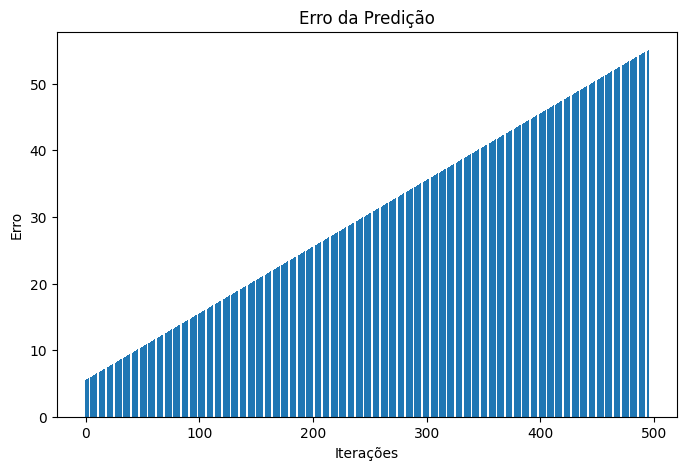

In [47]:
y_pred = model.predict(test_seqs)
erro = y_test - y_pred

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(
  x=range(len(erro)),
  height=erro.flatten()
)

ax.set(
  title='Erro da Predição',
  xlabel='Iterações',
  ylabel='Erro'
)
plt.show()

#Questão 6
Redes Neurais Recorrentes (RNNs) com células de Memória de Longo Prazo (LSTM) são um tipo de arquitetura de rede neural amplamente utilizada em deep learning, especialmente em tarefas relacionadas a sequências de dados. As LSTMs foram projetadas para superar as limitações das RNNs tradicionais, permitindo que os modelos capturem dependências temporais de longo prazo em sequências. Este modelo tem uma ampla gama de aplicações em deep learning como processamento de linguagem natural, conversão de voz, tradução de textos, entre outros.

No processamento de linguagem natural, as LSTMs são amplamente utilizadas para tarefas como análise de sentimento, classificação de texto, geração de texto, resumo de texto e resposta à perguntas. Elas são capazes de capturar a estrutura temporal das sequências de palavras e aprender dependências de longo prazo em textos.

Na conversão de voz para texto são usadas em sistemas de reconhecimento de fala, onde convertem o áudio da fala capturada em texto. Esses sistemas são usados em várias aplicações, como assistentes virtuais, legendas automáticas e transcrição de áudio.

Para tradução de textos são empregadas em sistemas de tradução automática, onde traduzem textos de um idioma para outro. Esses sistemas são usados em plataformas de tradução online, como o tradutor do Google, aplicativos de comunicação e localização de conteúdo.

Além das aplicações mencionadas, as LSTMs também são utilizadas em outras tarefas, como previsão de séries temporais, detecção de anomalias, reconhecimento de escrita manual, modelagem de sequências musicais e análise de dados biomédicos. Demonstrando-se ser uma poderosa ferramenta para área de Deep Learning.

#Questão 7
A transferência de aprendizado é uma abordagem no campo do deep learning que envolve a utilização do conhecimento adquirido por um modelo pré-treinado em uma tarefa para melhorar o desempenho em uma tarefa relacionada. Essa técnica é especialmente útil quando há disponibilidade limitada de dados de treinamento para a nova tarefa.

Esta técnica traz benefícios significativos, como a capacidade de acelerar o treinamento e melhorar a precisão do modelo. Além disso, permite que modelos sejam treinados com menos dados, o que é muito útil em casos onde a coleta e anotação de grandes conjuntos de dados são custosas ou impraticáveis.

As aplicações da transferência de aprendizado são amplas e abrangem várias áreas, incluindo visão computacional, processamento de linguagem natural, reconhecimento de voz, detecção de anomalias, diagnóstico médico, entre outros. Por exemplo, um modelo pré-treinado em uma grande base de dados de imagens pode ser usado como ponto de partida para uma tarefa de detecção de objetos em imagens médicas, ajudando a melhorar a precisão e a eficiência do modelo.

Além disso, a transferência de aprendizado é frequentemente utilizada para extrair características (ou embeddings) de alto nível de dados de entrada, que podem ser usadas em várias tarefas relacionadas. Por exemplo, um modelo pré-treinado em reconhecimento facial pode ser usado para extrair características faciais que são úteis em tarefas como reconhecimento de emoções ou autenticação biométrica.






#Trabalho utilizando Redes Generativas Adversárias (GAN)
###O código a seguir utiliza GAN para colorir imagens, fazendo uso de imagens coloridas e em preto e branco para fazer o treinamento. O guia base, e os arquivos de entradas, pode ser encontrado na plataforma [Kaggle](https://www.kaggle.com/code/theblackmamba31/pix2pix-gan-coloring-images/notebook)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


100%|█████████▉| 508/509 [00:01<00:00, 323.35it/s]


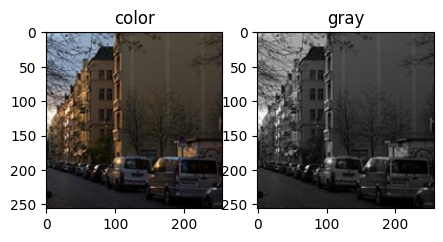

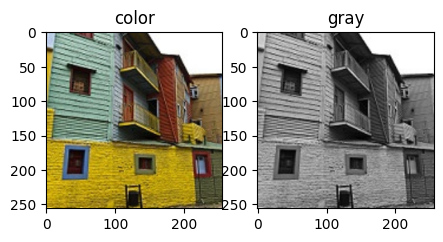

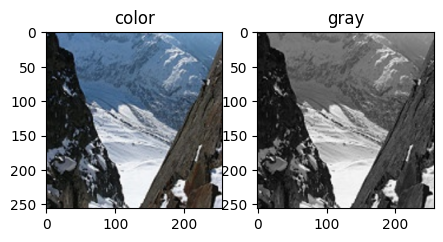

In [50]:
import tensorflow as tf
import keras 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
import re
from tensorflow.keras.preprocessing.image import img_to_array

from google.colab import drive
drive.mount('/content/drive')

# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)
# defining the size of the image
SIZE = 256
color_img = []
path = '/content/drive/MyDrive/IA/input/color'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):    
        if i == '1455.jpg':
            break
        else:    
            img = cv2.imread(path + '/'+i,1)
            # open cv reads images in BGR format so we have to convert it to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            #resizing image
            img = cv2.resize(img, (SIZE, SIZE))
            img = img.astype('float32') / 255.0
            color_img.append(img_to_array(img))

gray_img = []
path = '/content/drive/MyDrive/IA/input/gray'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
         if i == '1455.jpg':
            break
         else: 
            img = cv2.imread(path + '/'+i,1)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            #resizing image
            img = cv2.resize(img, (SIZE, SIZE))
            img = img.astype('float32') / 255.0
            gray_img.append(img_to_array(img))

color_dataset=tf.data.Dataset.from_tensor_slices(np.array(color_img[:1000])).batch(64)
gray_dataset=tf.data.Dataset.from_tensor_slices(np.array(gray_img[:1000])).batch(64)

color_dataset_t=tf.data.Dataset.from_tensor_slices(np.array(color_img[1000:])).batch(8)
gray_dataset_t=tf.data.Dataset.from_tensor_slices(np.array(gray_img[1000:])).batch(8)

example_color = next(iter(color_dataset))
example_gray = next(iter(gray_dataset))

def plot_images(a = 4):
    
    for i in range(a):
        plt.figure(figsize = (5,5))
        plt.subplot(121)
        plt.title('color')
        plt.imshow(example_color[i] )

        plt.subplot(122)
        plt.title('gray')
        plt.imshow(example_gray[i])
        plt.show()

plot_images(3)

In [52]:
def downsample(filters, size, apply_batchnorm=True):
  
  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer='he_normal', use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result

def upsample(filters, size, apply_dropout=False):
  

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer='he_normal',
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result

def Generator():
  inputs = tf.keras.layers.Input(shape=[256,256,3])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False), # (bs, 128, 128, 64)
    downsample(128, 4), # (bs, 64, 64, 128)
    downsample(256, 4), # (bs, 32, 32, 256)
    downsample(512, 4), # (bs, 16, 16, 512)
    downsample(512, 4), # (bs, 8, 8, 512)
    downsample(512, 4), # (bs, 4, 4, 512)
    downsample(512, 4), # (bs, 2, 2, 512)
    downsample(512, 4), # (bs, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True), # (bs, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True), # (bs, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True), # (bs, 8, 8, 1024)
    upsample(512, 4), # (bs, 16, 16, 1024)
    upsample(256, 4), # (bs, 32, 32, 512)
    upsample(128, 4), # (bs, 64, 64, 256)
    upsample(64, 4), # (bs, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(3, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh') # (bs, 256, 256, 3)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar]) # (bs, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x) # (bs, 128, 128, 64)
  down2 = downsample(128, 4)(down1) # (bs, 64, 64, 128)
  down3 = downsample(256, 4)(down2) # (bs, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3) # (bs, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1) # (bs, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu) # (bs, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2) # (bs, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

generator = Generator()
generator.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential_41 (Sequential)     (None, 128, 128, 64  3072        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 sequential_42 (Sequential)     (None, 64, 64, 128)  131584      ['sequential_41[0][0]']          
                                                                                            

In [53]:
discriminator = Discriminator()
discriminator.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 target_image (InputLayer)      [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 concatenate_22 (Concatenate)   (None, 256, 256, 6)  0           ['input_image[0][0]',            
                                                                  'target_image[0][0]']     

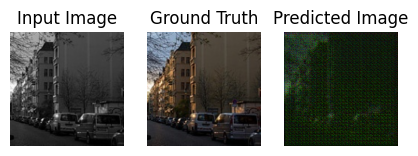

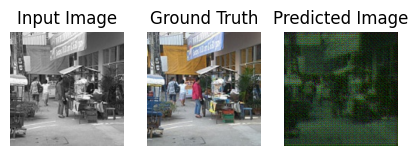

Epoch:  1

Time taken for epoch 1 is 30.14286231994629 sec

Epoch:  2

Time taken for epoch 2 is 41.66536808013916 sec

Epoch:  3

Time taken for epoch 3 is 21.045513153076172 sec

Epoch:  4

Time taken for epoch 4 is 22.143862009048462 sec

Epoch:  5

Time taken for epoch 5 is 21.737937927246094 sec

Epoch:  6

Time taken for epoch 6 is 41.65440130233765 sec

Epoch:  7

Time taken for epoch 7 is 21.26601815223694 sec

Epoch:  8

Time taken for epoch 8 is 22.197611331939697 sec

Epoch:  9

Time taken for epoch 9 is 21.836618423461914 sec

Epoch:  10

Time taken for epoch 10 is 21.24757742881775 sec



In [54]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

LAMBDA = 100

def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

def train_step(input_image, target, epoch):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))
  
import time
def fit(train_ds, epochs,):
  for epoch in range(epochs):
    start = time.time()

    print("Epoch: ", epoch+1)

    # Train
    for n, (input_image, target) in train_ds.enumerate():
      
      train_step(input_image, target, epoch)
    print()

  

    print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                        time.time()-start))
    
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(5,5))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i])
    plt.axis('off')
  plt.show()

for example_input, example_target in tf.data.Dataset.zip((gray_dataset,color_dataset)).take(2):
  generate_images(generator, example_input, example_target)

fit(tf.data.Dataset.zip((gray_dataset, color_dataset)),
    epochs = 10)

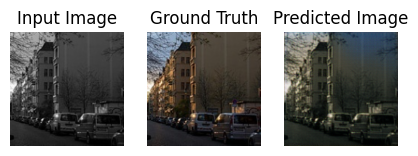

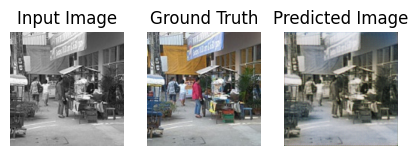

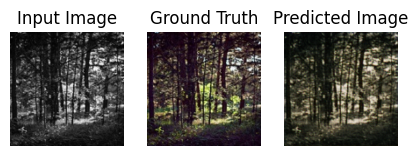

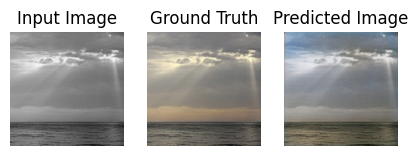

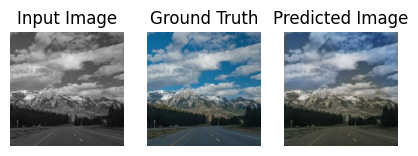

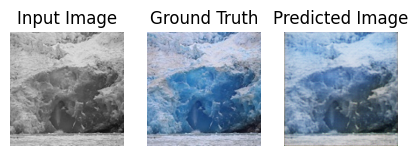

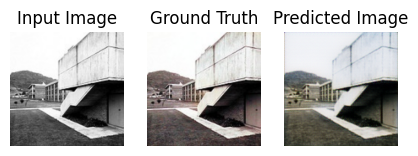

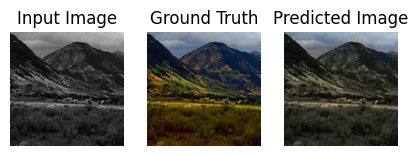

In [55]:
for example_input, example_target in tf.data.Dataset.zip((gray_dataset,color_dataset)).take(11):
  generate_images(generator, example_input, example_target)